# Week 3 Classification

**Reference: Chapter 3**

Last week we explored a regression task using primarily our own observation of the data. This week let's look at a classification task, and see how existing machine learning techniques can be applied to solve it.

## Classifying Points on the Plane

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load the data set

In [23]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/mixture.txt"
# Open the url in web brower and learn its raw format

# Load to Python as a data frame
raw_data = pd.read_csv(url, sep=',')

# Display first 5 rows
raw_data.head()

,x1,x2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


### 2. Data Exploration

In [4]:
# Show the size of the data set
raw_data.shape

(200, 3)

In [8]:
# Show the data type of each column
raw_data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [14]:
# Is there any missing values?
pd.isnull(raw_data).sum()

x1    0
x2    0
y     0
dtype: int64

In [11]:
# Example: A data frame with missing values
temp = pd.DataFrame({
    "Midterm": [100, 90, 80],
    "Final": [80, 90, 100],
    "Grade": ['A', np.nan, 'A']
})
temp

,Midterm,Final,Grade
0,100,80,A
1,90,90,NaN
2,80,100,A


In [13]:
pd.isnull(temp).sum()

Midterm    0
Final      0
Grade      1
dtype: int64

In [15]:
# DataFrame.info() is helpful
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
x1    200 non-null float64
x2    200 non-null float64
y     200 non-null int64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [16]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Midterm    3 non-null int64
Final      3 non-null int64
Grade      2 non-null object
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


In [17]:
# x1, x2 are numeric values. What is the distribution of values?
numeric_cols = ['x1', 'x2']
raw_data[numeric_cols].describe()

,x1,x2
count,200.000000,200.000000
mean,0.784672,0.756016
std,1.297582,1.026442
min,-2.520820,-1.999853
25%,-0.071465,0.095555
50%,0.859702,0.861387
75%,1.543438,1.435275
max,4.170746,2.855805


In [18]:
raw_data[numeric_cols].min()

x1   -2.520820
x2   -1.999853
dtype: float64

In [19]:
raw_data[numeric_cols].mean()

x1    0.784672
x2    0.756016
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBABBF0320>,
      dtype=object)

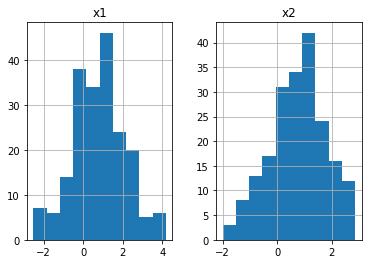

In [25]:
# plot the distribution as histograms
raw_data[numeric_cols].hist()

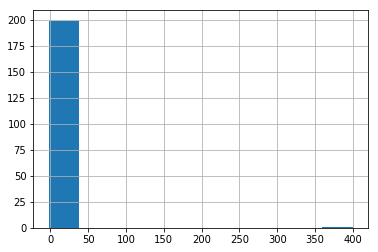

In [24]:
# This is what the histogram would look like if an outlier 400 is present

# Create a new copy of raw_data, so that raw_data is not affected
temp = raw_data.copy()
orig = temp.loc[0, 'x1']
temp.loc[0, 'x1'] = 400
temp['x1'].hist()

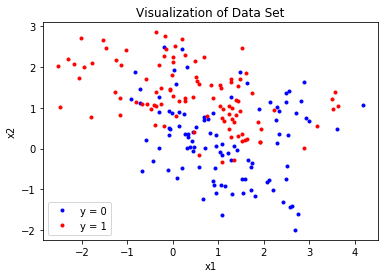

In [32]:
# Plot data as points on a 2D plane
blue_pts = raw_data[raw_data['y'] == 0]
red_pts = raw_data[raw_data['y'] == 1]
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b.', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r.', label='y = 1')
plt.title('Visualization of Data Set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.savefig('Week3Fig.png')

### 3. Build a Classification Model
The `sklearn` package provides implementations of many existing machine elarning techniques. Today we are going to apply **support vector machine (SVM)** and **k-nearest-neighbors** method to build two different classification models.

### Attempt 1: Linear SVM

![Illustration of SVM](https://data-flair.training/blogs/wp-content/uploads/sites/2/2019/07/introduction-to-SVM.png)

In [33]:
# SVM model
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
input_cols = ['x1', 'x2']
model_svm.fit(raw_data[input_cols], raw_data['y'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
# Predict the class of point(-2, 2) and (3, -1)
test_data = pd.DataFrame({
    'x1': [-2, 3, 0],
    'x2': [2, -1, -2]
})
test_data

,x1,x2
0,-2,2
1,3,-1
2,0,-2


In [37]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

[1 0 0]


In [38]:
# Visualize the decision region
test_data_full = pd.DataFrame()
x1_coordinates = np.linspace(-3, 4, 100) # sample 100 points per row
x2_coordinates = np.linspace(-2, 3, 100) # sample 100 rows (total: 100 * 100 = 10,000 points)
for x1 in x1_coordinates:
    for x2 in x2_coordinates:
        test_data_full = test_data_full.append({'x1': x1,
                               'x2': x2},
                              ignore_index=True)
test_data_full

,x1,x2
0,-3.0,-2.000000
1,-3.0,-1.949495
2,-3.0,-1.898990
3,-3.0,-1.848485
4,-3.0,-1.797980
...,...,...
9995,4.0,2.797980
9996,4.0,2.848485
9997,4.0,2.898990
9998,4.0,2.949495


In [39]:
test_data_full.shape

(10000, 2)

In [40]:
test_data_full['prediction'] = model_svm.predict(test_data_full[['x1', 'x2']])
test_data_full.head()

,x1,x2,prediction
0,-3.0,-2.000000,0
1,-3.0,-1.949495,0
2,-3.0,-1.898990,0
3,-3.0,-1.848485,0
4,-3.0,-1.797980,0


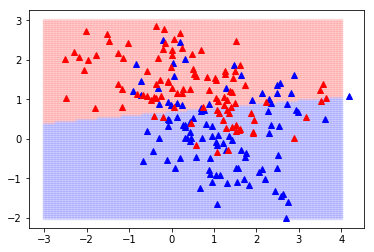

In [41]:
test_data_blue = test_data_full[test_data_full['prediction'] == 0]
test_data_red = test_data_full[test_data_full['prediction'] == 1]
plt.plot(test_data_blue['x1'], test_data_blue['x2'], 'b.', alpha=0.1)
plt.plot(test_data_red['x1'], test_data_red['x2'], 'r.', alpha=0.1)
plt.plot(blue_pts['x1'], blue_pts['x2'], 'b^', label='y = 0')
plt.plot(red_pts['x1'], red_pts['x2'], 'r^', label='y = 1')

**Discussion:** How to evaluate this model?

In [ ]:
# Calculate the prediction error rate on given data set


In [ ]:
# Split the data set into training set (80%) and test set (20%), 
# and build a SVM model on the new training set


In [ ]:
# Calculate the classification error on the test set


### Attempt 2:  3-Nearest-Neighbor
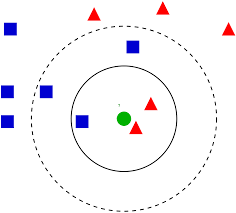

In [42]:
# kNN model
from sklearn.neighbors import KNeighborsClassifier
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(raw_data[['x1', 'x2']], raw_data['y'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
# We defined test_data before
test_data

In [ ]:
predictions = model_svm.predict(test_data[['x1', 'x2']])
print(predictions)

In [ ]:
# Find model prediction on each point in test_data_full


In [ ]:
# Plot the decision regions


# Week 3 Homework (Due on Monday, Feb. 17 at 11:59PM)
Build kNN model with k = 1, 15, 50 on the training set.  For each model, display the decision regions and error rate on the training data.